In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
bc = pd.read_csv(r'C:\Users\ITU\Desktop\machine learning project\data.csv',encoding='utf-8');

In [3]:
bc.head()  
P=bc.iloc[:,2:32]

In [4]:
bc.iloc[:,2:32].describe() 

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
yd=pd.get_dummies(bc.diagnosis)
y=yd.M
y.head() # response variable

0    1
1    1
2    1
3    1
4    1
Name: M, dtype: uint8

In [6]:
# standardizing and PCA
scaler = StandardScaler()
P_scaled=scaler.fit_transform(P)
P_scaled=pd.DataFrame(P_scaled)
PP=P_scaled.drop(P_scaled.columns[[2, 3, 22, 23, 12, 13]], axis=1) 
pca=PCA(n_components=0.95)
P_pca=pca.fit_transform(PP)
print (P_pca.shape)
print(pca.explained_variance_ratio_) 
print (pca.explained_variance_ratio_.sum())

(569, 11)
[0.42661046 0.15932139 0.10294428 0.07788731 0.06489774 0.05015242
 0.02145044 0.0187846  0.01505759 0.01197751 0.01117206]
0.9602558201892891


In [8]:
print(bc.groupby('diagnosis').size())

diagnosis
B    357
M    212
dtype: int64


C:\Users\ITU\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


AttributeError: module 'seaborn' has no attribute 'plt'

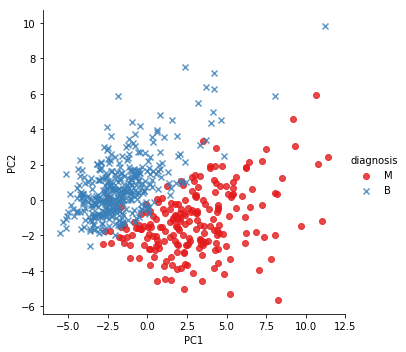

In [9]:
n=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','diagnosis']
d=bc.iloc[:,1:2]  # diagnosis column
#merging the reduced data with diagnosis column
Xy=pd.DataFrame(np.hstack([P_pca,d.as_matrix()]),columns=n)
# plotting the the first 2 pca components against diagnosis
sns.lmplot("PC1", "PC2", hue="diagnosis", data=Xy, fit_reg=False,markers=["o", "x"],palette="Set1")
sns.plt.show()

In [12]:
from sklearn.model_selection import train_test_split
#predictor X
X=(Xy.iloc[:,0:11]).as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

C:\Users\ITU\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier()

[0.924 0.874 0.937 0.924 0.943 0.925 0.925 0.912 0.918 0.906 0.906 0.887
 0.9   0.887 0.893 0.874 0.893 0.868 0.887 0.868 0.887 0.875 0.887 0.875
 0.881 0.874 0.893 0.862 0.862 0.856 0.875 0.855 0.862 0.855 0.862 0.849
 0.862 0.843 0.85  0.843 0.843 0.83  0.837 0.83  0.843 0.83  0.837 0.837
 0.837]


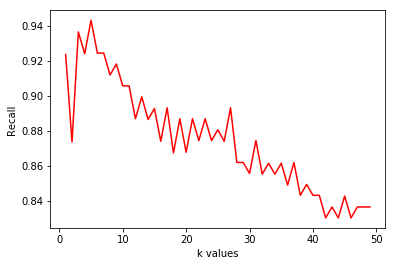

In [15]:
k_range=list(range(1,50))
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn, X_train,y_train,cv=10,scoring='recall')
    k_scores.append(scores.mean())
print(np.round(k_scores,3)) # to display scores to 3 decimal places
from matplotlib import pyplot as plt
plt.plot(k_range,k_scores,color="red")
plt.xlabel('k values')
plt.ylabel('Recall')
plt.show()

In [16]:
from sklearn.model_selection import learning_curve, GridSearchCV

In [17]:
k_range=list(range(1,50))
param_grid=dict(n_neighbors=k_range)
scores = ['accuracy', 'recall'] # evaluation scores for selecting best parameter
for sc in scores:
    grid_knn=GridSearchCV(knn,param_grid,cv=10,scoring=sc,n_jobs=-1)
    print("# Tuning hyper-parameters for %s" % sc)
    grid_knn.fit(X_train,y_train)
    print(grid_knn.best_params_)
    print(np.round(grid_knn.best_score_,3))

# Tuning hyper-parameters for accuracy


C:\Users\ITU\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 6}
0.96
# Tuning hyper-parameters for recall
{'n_neighbors': 5}
0.943


C:\Users\ITU\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


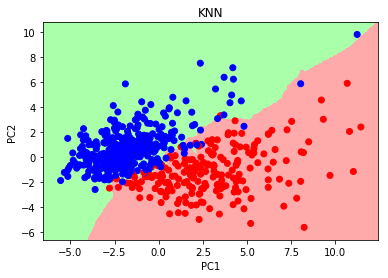

In [18]:
# fitting the optimal model (i.e. knn with k=5 based upon recall score) onto the training data
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# for display purposes, we fit the model on the first two components i.e. PC1, and PC2
knn.fit(X_train[:,0:2], y_train)
# Plotting the decision boundary for all data (both train and test)
# Create color maps
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#AAFFAA','#FFAAAA'])
cmap_bold = ListedColormap(['#0000FF','#FF0000'])
# creating a meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h=0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
xy_mesh=np.c_[xx.ravel(), yy.ravel()]
Z = knn.predict(xy_mesh)
%matplotlib inline
Z = Z.reshape(xx.shape)
#print(Z)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
ax=plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max());plt.ylim(yy.min(), yy.max())
plt.xlabel('PC1');plt.ylabel('PC2')
plt.title('KNN')
plt.show()

In [19]:
from sklearn.metrics import roc_curve

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
svc=SVC()
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4, 1e-5],'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
scores = ['accuracy', 'recall']
for sc in scores:
    grid=GridSearchCV(svc,param_grid,cv=10,scoring=sc,n_jobs=-1)
    print("# Tuning hyper-parameters for %s" % sc)
    grid.fit(X_train,y_train)
    print(grid.best_params_)
    print(np.round(grid.best_score_,3))

# Tuning hyper-parameters for accuracy
{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.979
# Tuning hyper-parameters for recall
{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.962


C:\Users\ITU\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


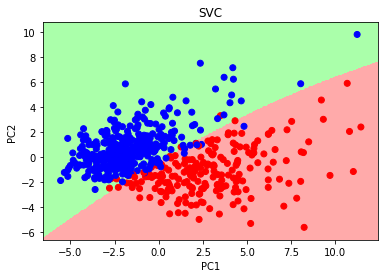

In [21]:
# fitting the optimal model onto the training data
svc=SVC(C=100,gamma=0.001,kernel='rbf')
svc.fit(X_train, y_train)

# for display purposes, we fit the model on the first two components i.e. PC1, and PC2
svc.fit(X_train[:,0:2], y_train)

# Plotting the decision boundary for all data (both train and test)
# Create color maps
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#AAFFAA','#FFAAAA'])
cmap_bold = ListedColormap(['#0000FF','#FF0000'])

# creating a meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h=0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
xy_mesh=np.c_[xx.ravel(), yy.ravel()]
Z = svc.predict(xy_mesh)
Z = Z.reshape(xx.shape)

#plotting data on decision boundary
%matplotlib inline
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('PC1');plt.ylabel('PC2')
plt.title('SVC')
plt.show()

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection  import cross_val_score
from sklearn.model_selection import learning_curve, GridSearchCV

In [31]:
lgr = LogisticRegression()

#parameter tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
scores = ['accuracy', 'recall']
for sc in scores:
    grid_lgr=GridSearchCV(lgr,param_grid,cv=10,scoring=sc,n_jobs=-1)
    print("# Tuning hyper-parameters for %s" % sc)
    grid_lgr.fit(X_train,y_train)
    print(grid_lgr.best_params_)
    print(np.round(grid_lgr.best_score_,3))

# Tuning hyper-parameters for accuracy


C:\Users\ITU\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\ITU\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ITU\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 0.1}
0.979
# Tuning hyper-parameters for recall
{'C': 1}
0.962


C:\Users\ITU\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C:\Users\ITU\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ITU\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


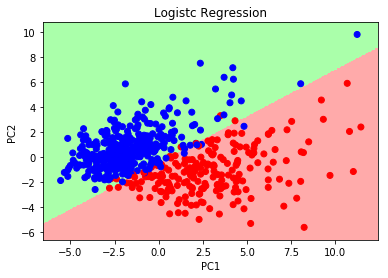

In [33]:
# fitting the optimal model onto the training data
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# fitting the optimal model onto the training data
lgr=LogisticRegression(C=1)
lgr.fit(X_train, y_train)

# for display purposes, we fit the model on the first two components i.e. PC1, and PC2
lgr.fit(X_train[:,0:2], y_train)

# Plotting the decision boundary for all data (both train and test)
# Create color maps
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#AAFFAA','#FFAAAA'])
cmap_bold = ListedColormap(['#0000FF','#FF0000'])

# creating a meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h=0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
xy_mesh=np.c_[xx.ravel(), yy.ravel()]
Z = lgr.predict(xy_mesh)
Z = Z.reshape(xx.shape)

%matplotlib inline
#print(Z)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('PC1');plt.ylabel('PC2')
plt.title('Logistc Regression')
plt.show()


KNN:
 confusion matrix
 [[89  1]
 [ 5 48]] 


Confusion matrix plot of KNN classifier


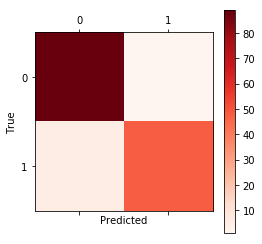


 Classification report 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        90
           1       0.98      0.91      0.94        53

   micro avg       0.96      0.96      0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143

#############################################################################
SVC:
 confusion matrix
 [[89  1]
 [ 3 50]] 


Confusion matrix plot of SVC


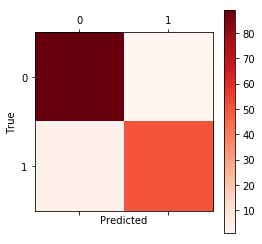


 Classification report 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        90
           1       0.98      0.94      0.96        53

   micro avg       0.97      0.97      0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

#############################################################################
Logistic Regression:
confusion matrix
 [[89  1]
 [ 3 50]] 


Confusion matrix plot of Logistic regression


C:\Users\ITU\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


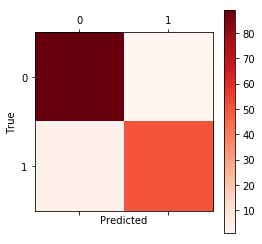


 Classification report 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        90
           1       0.98      0.94      0.96        53

   micro avg       0.97      0.97      0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [34]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# KNN
# fitting the knn model on the training data
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn =knn.predict(X_test)
# computing and plotting confusion matrix
c_m = confusion_matrix(y_test, y_pred_knn)
print('KNN:\n confusion matrix\n', c_m,'\n\n')
ax=plt.matshow(c_m,cmap=plt.cm.Reds)
print('Confusion matrix plot of KNN classifier')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# classification report
print('\n Classification report \n',classification_report(y_test, y_pred_knn))
print ('#############################################################################')

# SVC
# fitting the SVC model on the training data and predicting for test data
svc=SVC(C=100,gamma=0.001,kernel='rbf',probability=True)
svc.fit(X_train, y_train)
y_pred_svc =svc.predict(X_test)
# computing and plotting confusion matrix
c_m = confusion_matrix(y_test, y_pred_svc)
print('SVC:\n confusion matrix\n', c_m,'\n\n')
ax=plt.matshow(c_m,cmap=plt.cm.Reds)
print('Confusion matrix plot of SVC')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# classification report
print('\n Classification report \n',classification_report(y_test, y_pred_svc))
print ('#############################################################################')

# Logistic Regression
# fitting the lgr model on the training data
lgr=LogisticRegression(C=1)
lgr.fit(X_train, y_train)
y_pred_lgr =lgr.predict(X_test)
# computing and plotting confusion matrix
c_m = confusion_matrix(y_test, y_pred_lgr)
print('Logistic Regression:\nconfusion matrix\n', c_m,'\n\n')
ax=plt.matshow(c_m,cmap=plt.cm.Reds)
print('Confusion matrix plot of Logistic regression')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# classification report
print('\n Classification report \n',classification_report(y_test, y_pred_lgr))

model: KNN
thresholds: [2.  1.  0.8 0.6 0.4 0.2 0. ]
tpr:        [0.    0.736 0.868 0.906 0.943 0.962 1.   ]
fpr:        [0.    0.011 0.011 0.011 0.044 0.222 1.   ]
model: SVC
thresholds: [2.    1.    0.784 0.631 0.512 0.5   0.455 0.424 0.375 0.334 0.318 0.   ]
tpr:        [0.    0.057 0.925 0.925 0.943 0.943 0.962 0.962 0.981 0.981 1.    1.   ]
fpr:        [0.    0.    0.    0.011 0.011 0.022 0.022 0.033 0.033 0.044 0.044 1.   ]
model: Logistic
thresholds: [2.    1.    0.737 0.616 0.565 0.461 0.429 0.427 0.375 0.024 0.023 0.   ]
tpr:        [0.    0.019 0.925 0.925 0.943 0.943 0.962 0.962 0.981 0.981 1.    1.   ]
fpr:        [0.    0.    0.    0.011 0.011 0.033 0.033 0.044 0.044 0.267 0.267 1.   ]


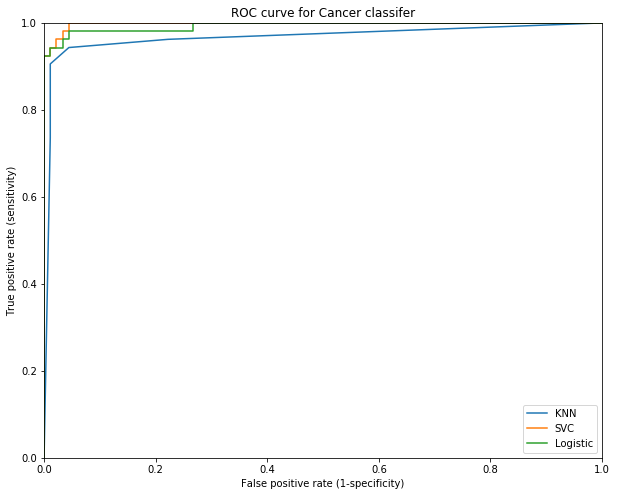

In [35]:
# false positive rate,fpr= FP/(TN+FP) OR fpr=1-specificty, tpr=sensitivity 
y_pred_knn_p =knn.predict_proba(X_test)[:,1]
y_pred_svc_p =svc.predict_proba(X_test)[:,1]
y_pred_lgr_p =lgr.predict_proba(X_test)[:,1]

models=[y_pred_knn_p,y_pred_svc_p,y_pred_lgr_p]
label=['KNN','SVC','Logistic']

# plotting ROC curves
plt.figure(figsize=(10, 8))
m=np.arange(3)
for m in m:
    fpr, tpr,thresholds= metrics.roc_curve(y_test,models[m])
    print('model:',label[m])
    print('thresholds:',np.round(thresholds,3))
    print('tpr:       ',np.round(tpr,3))
    print('fpr:       ',np.round(fpr,3))
    plt.plot(fpr,tpr,label=label[m])
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curve for Cancer classifer')
plt.xlabel('False positive rate (1-specificity)')
plt.ylabel('True positive rate (sensitivity)')
plt.legend(loc=4,)

In [36]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras.preprocessing.image
import sklearn.preprocessing
import sklearn.model_selection
import sklearn.metrics
import sklearn.linear_model
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import os;
import datetime  
import cv2 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm  
%matplotlib inline

Using TensorFlow backend.


In [38]:
## import data

# load images of shape (5547, 50, 50, 3)
x_images = np.load('C:\\Users\\ITU\\Desktop\\machine learning project\\X.npy')  

# load labels of shape (5547,1); (0 = no cancer, 1 = cancer)
y_images = np.load('C:\\Users\\ITU\\Desktop\\machine learning project\\Y.npy')   

# shuffle data
perm_array = np.arange(len(x_images))
np.random.shuffle(perm_array)
x_images = x_images[perm_array]
y_images = y_images[perm_array]

print('x_images.shape =', x_images.shape)
print('x_images.min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(x_images.min(),
                        x_images.mean(), x_images.std(), x_images.max()))
print('')
print('y_images.shape =', y_images.shape)
print('y_images.min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(y_images.min(),
                        y_images.mean(), y_images.std(), y_images.max()))

x_images.shape = (5547, 50, 50, 3)
x_images.min/mean/std/max = 2.00/185.03/47.25/255.00

y_images.shape = (5547,)
y_images.min/mean/std/max = 0.00/0.50/0.50/1.00


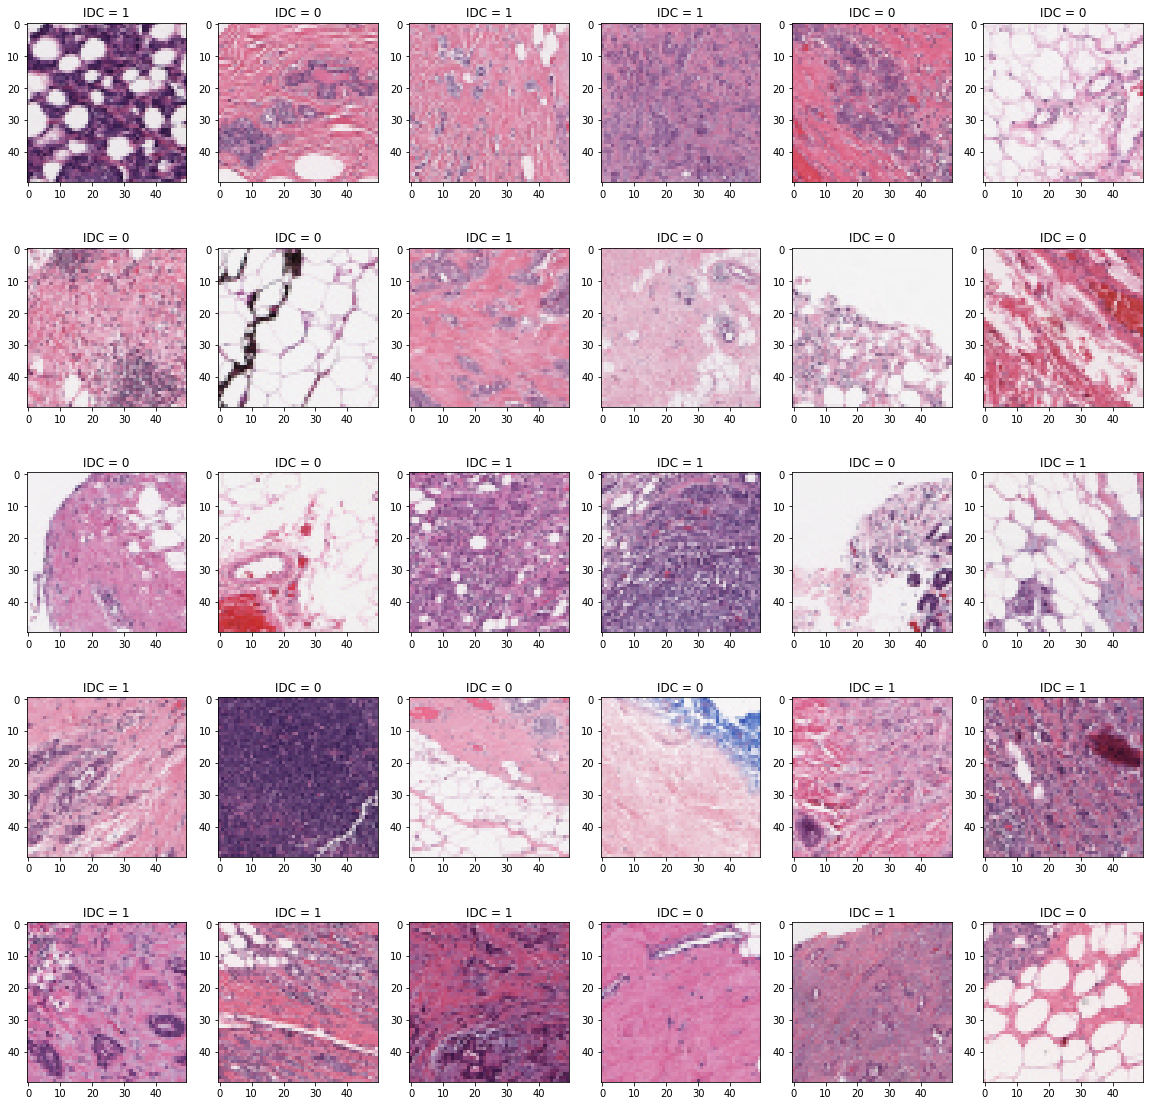

In [39]:
## plot some images  

imgs_0 = x_images[y_images == 0] # 0 = no cancer
imgs_1 = x_images[y_images == 1] # 1 = cancer

plt.figure(figsize=(20,20))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.title('IDC = %d'%y_images[i])
    plt.imshow(x_images[i])

red channel: min/mean/std/max = 4.00/205.79/36.29/255.00
green channel: min/mean/std/max = 2.00/161.87/53.94/255.00
blue channel: min/mean/std/max = 5.00/187.44/38.69/255.00


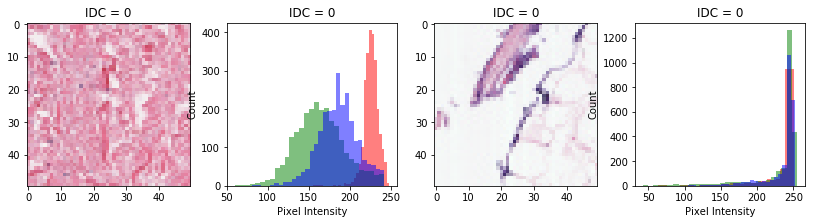

In [40]:
plt.figure(figsize=(14,3))

for i in range(2):
    n_img = np.random.randint(len(x_images))
    plt.subplot(1,4,1+2*i)
    plt.title('IDC = %d'%y_images[n_img])
    plt.imshow(x_images[n_img])
    plt.subplot(1,4,2+2*i)
    plt.title('IDC = %d'%y_images[n_img])
    plt.ylabel('Count')
    plt.xlabel('Pixel Intensity')
    plt.hist(x_images[n_img,:,:,0].flatten(), bins=30, lw = 0,color='r', alpha=0.5);
    plt.hist(x_images[n_img,:,:,1].flatten(), bins=30, lw = 0, color='g', alpha=0.5);
    plt.hist(x_images[n_img,:,:,2].flatten(), bins=30, lw = 0, color='b', alpha=0.5);

print('red channel: min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(x_images[:,:,:,0].min(),
    x_images[:,:,:,0].mean(), x_images[:,:,:,0].std(), x_images[:,:,:,0].max()))
print('green channel: min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(x_images[:,:,:,1].min(),
    x_images[:,:,:,1].mean(), x_images[:,:,:,1].std(), x_images[:,:,:,1].max()))
print('blue channel: min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(x_images[:,:,:,2].min(),
    x_images[:,:,:,2].mean(), x_images[:,:,:,2].std(), x_images[:,:,:,2].max()))

In [41]:
import time

In [42]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

In [43]:
diag_map = {'M':1, 'B':0}
bc['diagnosis'] = bc['diagnosis'].map(diag_map)

In [44]:
features_selection = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean']

In [47]:
features_mean= list(bc.columns[1:11])

In [48]:
X = bc.loc[:,features_mean]
y = bc.loc[:, 'diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

accuracy_all = []
cvs_all = []

In [49]:
from sklearn.linear_model import SGDClassifier

start = time.time()

clf = SGDClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("SGD Classifier Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

SGD Classifier Accuracy: 64.04%
Cross validation score: 80.14% (+/- 13.93%)
Execution time: 0.023938 seconds 



C:\Users\ITU\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\ITU\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\ITU\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and 